# Preparing data

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_money = pd.read_csv('Money.csv')
df_money = df_money.drop_duplicates()
df_money = df_money.dropna()

df_groups = pd.read_csv('ABgroup.csv')
df_groups = df_groups.drop_duplicates()
df_groups = df_groups.dropna()

df_players = pd.read_csv('Players.csv')
df_players = df_players.dropna()

In [42]:
df_platforms = pd.read_csv('Platforms.csv')
df_platforms = df_platforms.drop_duplicates()
df_platforms = df_platforms.dropna()

df_gamecash = pd.read_csv('Cash.csv')
df_gamecash = df_gamecash.drop_duplicates()
df_gamecash = df_gamecash.dropna()

# No cheaters AB groups

In [43]:
df_group = df_players.merge(df_groups, on = 'user_id', how = 'left')
df_group = df_group.drop(['trans_sum', 'game_cash'], axis = 1)
df_group.head()

,user_id,group
0,TWLWB9-L19SYJ,test
1,SD0L4U-1JG4WN,control
2,QZVG35-P8JKNU,test
3,S2VBV4-ZKBHI6,test
4,DDGKMQ-45SP8R,control


# AB game cash

In [44]:
df_gamecash_group = df_group.merge(df_gamecash, on = 'user_id', how = 'left')
df_gamecash_group.head()

,user_id,group,date,cash
0,TWLWB9-L19SYJ,test,10.07.2021,200
1,TWLWB9-L19SYJ,test,11.07.2021,1050
2,TWLWB9-L19SYJ,test,16.07.2021,1100
3,TWLWB9-L19SYJ,test,13.07.2021,150
4,TWLWB9-L19SYJ,test,17.07.2021,2650


In [45]:
a_gamecash = df_gamecash_group[df_gamecash_group['group'] == 'control']
b_gamecash = df_gamecash_group[df_gamecash_group['group'] == 'test']

# AB game cash platforms

In [46]:
a_cash_platforms = a_gamecash.merge(df_platforms, on = 'user_id', how = 'left')
a_cash_platforms.head()

,user_id,group,date,cash,platform
0,SD0L4U-1JG4WN,control,15.07.2021,0,PC
1,SD0L4U-1JG4WN,control,16.07.2021,0,PC
2,SD0L4U-1JG4WN,control,11.07.2021,550,PC
3,SD0L4U-1JG4WN,control,14.07.2021,200,PC
4,SD0L4U-1JG4WN,control,17.07.2021,0,PC


In [47]:
a_cash_platforms = a_cash_platforms.groupby(['date', 'platform'])['cash'].sum().reset_index()
a_cash_platforms.head()

,date,platform,cash
0,10.07.2021,PC,134581500
1,10.07.2021,PS4,134888150
2,10.07.2021,XBox,144440500
3,11.07.2021,PC,134446200
4,11.07.2021,PS4,134728300


In [48]:
b_cash_platforms = b_gamecash.merge(df_platforms, on = 'user_id', how = 'left')
b_cash_platforms.head()

,user_id,group,date,cash,platform
0,TWLWB9-L19SYJ,test,10.07.2021,200,PS4
1,TWLWB9-L19SYJ,test,11.07.2021,1050,PS4
2,TWLWB9-L19SYJ,test,16.07.2021,1100,PS4
3,TWLWB9-L19SYJ,test,13.07.2021,150,PS4
4,TWLWB9-L19SYJ,test,17.07.2021,2650,PS4


In [49]:
b_cash_platforms = b_cash_platforms.groupby(['date', 'platform'])['cash'].sum().reset_index()
b_cash_platforms.head(20)

,date,platform,cash
0,10.07.2021,PC,152430400
1,10.07.2021,PS4,143363650
2,10.07.2021,XBox,143660800
3,11.07.2021,PC,152300500
4,11.07.2021,PS4,143342500
5,11.07.2021,XBox,144032100
6,12.07.2021,PC,151474600
7,12.07.2021,PS4,142478800
8,12.07.2021,XBox,143092100
9,13.07.2021,PC,147699500


In [50]:
custom_palette = {
    'PC': '#ff9be9',    
    'PS4': '#7d0b64',    
    'XBox': '#6e50e3'    
}

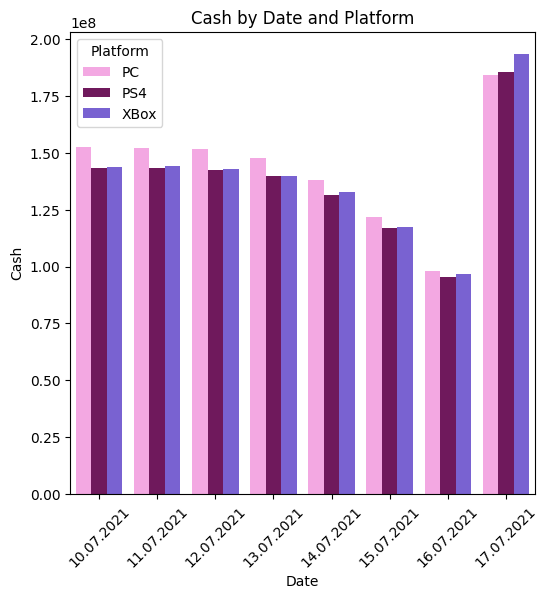

In [51]:
plt.figure(figsize = (6, 6))
sns.barplot(x = b_cash_platforms['date'], y = b_cash_platforms['cash'], hue = b_cash_platforms['platform'], palette = custom_palette)
plt.title('Cash by Date and Platform')
plt.xlabel('Date')
plt.ylabel('Cash')
plt.xticks(rotation = 45)
plt.legend(title='Platform')
plt.show()

# Analysis:

### The barplot of above conveys information regarding to the in game cash by date and platform. The first three days in game  money parameter was holding steady to the same exact position with following decline as it come closer to the end day of promotion. That dip on 16th of July may be a result of networking issues or the end of the working week. However, the last day remarked as the peak of raise in game money. That result may be considered due to the last day of promotion or a weekend when people have more desire and spare time for playing on platforms. 

### Considering cash amount by platforms the PC leading was noticeable during all days but the last one when cash quantity from XBox suddenly surged. The PS4 values were gradualy declining from the start to the 16th of July with following rise on the last day.

# AB money

In [52]:
df_money_group = df_group.merge(df_money, on = 'user_id', how = 'left')

In [53]:
df_money_group['is_paying_user'] = df_money_group.groupby('user_id')['money'].transform(lambda x: 0 if x.sum() > 0 else 1)

In [54]:
a_money = df_money_group[df_money_group['group'] == 'control']
b_money = df_money_group[df_money_group['group'] == 'test']

In [55]:
arpu_ab_money = df_money_group.groupby(['date', 'group']).agg({'money':'sum', 'is_paying_user': 'sum', 'user_id':'count'}).reset_index()
arpu_ab_money.rename(columns = {'user_id' : 'total_users_amount', 'is_paying_user' : 'non_paying_users'}, inplace = True)

In [56]:
arpu_ab_money['paying_users'] = arpu_ab_money['total_users_amount'] - arpu_ab_money['non_paying_users']
arpu_ab_money = arpu_ab_money.drop(['non_paying_users'], axis = 1)
arpu_ab_money['arpu'] =arpu_ab_money['money'] / arpu_ab_money['total_users_amount']
arpu_ab_money['arppu'] =arpu_ab_money['money'] / arpu_ab_money['paying_users']
arpu_ab_money.head()

,date,group,money,total_users_amount,paying_users,arpu,arppu
0,10.07.2021,control,228177.62,312224,305784,0.730814,0.746205
1,10.07.2021,test,238143.45,312597,307389,0.761823,0.774730
2,11.07.2021,control,227101.90,312904,306377,0.725788,0.741250
3,11.07.2021,test,237586.73,312272,307008,0.760833,0.773878
4,12.07.2021,control,226280.81,312926,306342,0.723113,0.738654


# AB money platforms

In [57]:
a_money_platforms = a_money.merge(df_platforms, on = 'user_id', how = 'left')
a_money_platforms.head()

,user_id,group,date,money,is_paying_user,platform
0,SD0L4U-1JG4WN,control,12.07.2021,0.99,0,PC
1,SD0L4U-1JG4WN,control,15.07.2021,0.00,0,PC
2,SD0L4U-1JG4WN,control,13.07.2021,0.99,0,PC
3,SD0L4U-1JG4WN,control,14.07.2021,0.00,0,PC
4,SD0L4U-1JG4WN,control,17.07.2021,0.00,0,PC


In [58]:
a_money_platforms = a_money_platforms.groupby(['date', 'platform']).agg({'money': 'sum', 'is_paying_user' :'sum', 'group': 'count'}).reset_index()
a_money_platforms.rename(columns = {'is_paying_user':'non_paying_user','group':'total_users_amount'}, inplace = True)
a_money_platforms['paying_users'] = a_money_platforms['total_users_amount'] - a_money_platforms['non_paying_user']
a_money_platforms['arpu'] = a_money_platforms['money'] / a_money_platforms['total_users_amount']
a_money_platforms['arppu'] = a_money_platforms['money'] / a_money_platforms['paying_users']
a_money_platforms.drop('non_paying_user', axis = 1)
a_money_platforms.head()

,date,platform,money,non_paying_user,total_users_amount,paying_users,arpu,arppu
0,10.07.2021,PC,74543.04,2348,103840,101492,0.717864,0.734472
1,10.07.2021,PS4,74513.05,2233,103944,101711,0.716858,0.732596
2,10.07.2021,XBox,79121.53,1859,104440,102581,0.757579,0.771308
3,11.07.2021,PC,73956.86,2349,103904,101555,0.711781,0.728244
4,11.07.2021,PS4,74376.14,2336,104580,102244,0.711189,0.727438


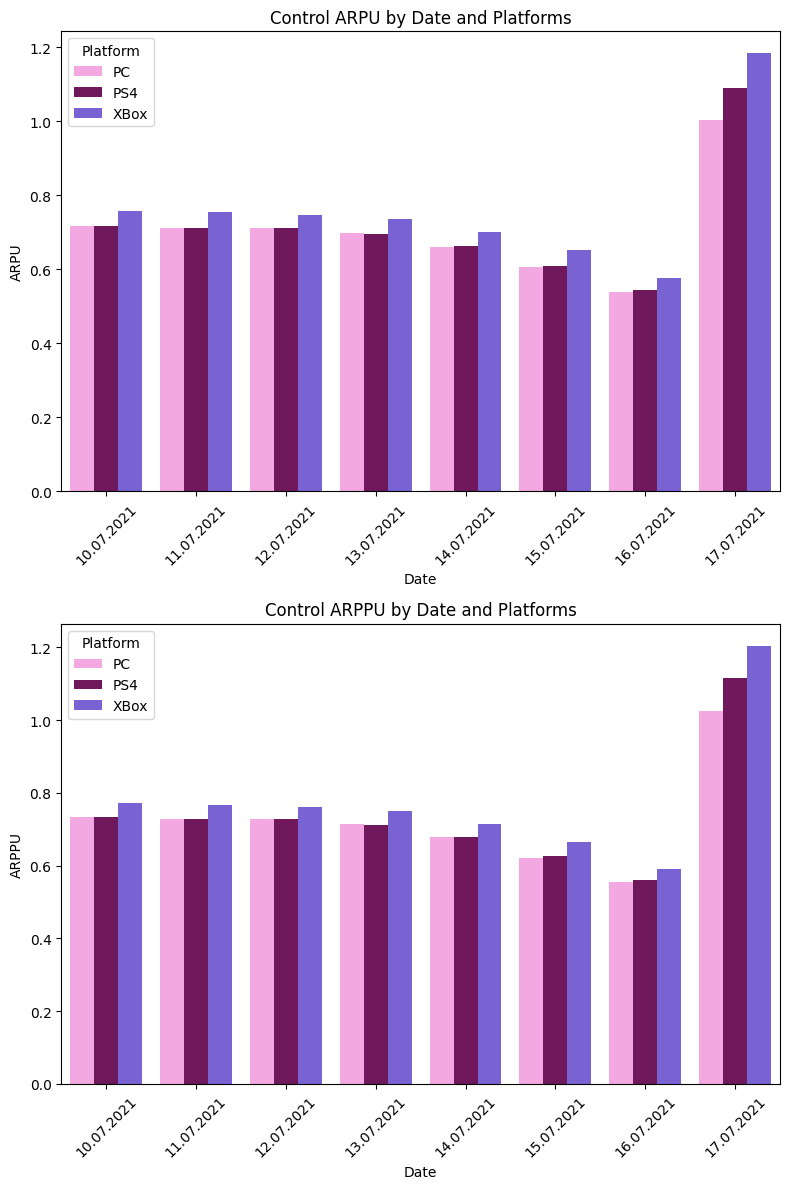

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

sns.barplot(x='date', y='arpu', hue='platform', data=a_money_platforms, palette=custom_palette, ax=axes[0])
axes[0].set_title('Control ARPU by Date and Platforms')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('ARPU')
axes[0].legend(title='Platform')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='date', y='arppu', hue='platform', data=a_money_platforms, palette=custom_palette, ax=axes[1])
axes[1].set_title('Control ARPPU by Date and Platforms')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('ARPPU')
axes[1].legend(title='Platform')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analysis

### As in in game cash analysis the peak of values is on the last day of promotion and remarkeble decline is on the 16th of July. ARPU and ARPPU for PC and PS4 stayed almost the same for 6 days but on the last day PS4 took a lead. The highest parameters were from XBox platform throughout whole ab testing.

In [64]:
b_money_platforms = b_money.merge(df_platforms, on = 'user_id', how = 'left')
b_money_platforms.head()

,user_id,group,date,money,is_paying_user,platform
0,TWLWB9-L19SYJ,test,11.07.2021,0.99,0,PS4
1,TWLWB9-L19SYJ,test,12.07.2021,0.00,0,PS4
2,TWLWB9-L19SYJ,test,16.07.2021,1.99,0,PS4
3,TWLWB9-L19SYJ,test,17.07.2021,1.99,0,PS4
4,QZVG35-P8JKNU,test,16.07.2021,0.00,0,PS4


In [65]:
b_money_platforms = b_money_platforms.groupby(['date', 'platform']).agg({'money': 'sum', 'is_paying_user' :'sum', 'group': 'count'}).reset_index()
b_money_platforms.rename(columns = {'is_paying_user':'non_paying_user','group':'total_users_amount'}, inplace = True)
b_money_platforms['paying_users'] = b_money_platforms['total_users_amount'] - b_money_platforms['non_paying_user']
b_money_platforms['arpu'] = b_money_platforms['money'] / b_money_platforms['total_users_amount']
b_money_platforms['arppu'] = b_money_platforms['money'] / b_money_platforms['paying_users']
b_money_platforms.drop('non_paying_user', axis = 1)
b_money_platforms.head()

,date,platform,money,non_paying_user,total_users_amount,paying_users,arpu,arppu
0,10.07.2021,PC,81553.02,1596,104130,102534,0.783185,0.795375
1,10.07.2021,PS4,78370.26,1820,104220,102400,0.751969,0.765335
2,10.07.2021,XBox,78220.17,1792,104247,102455,0.750335,0.763459
3,11.07.2021,PC,81345.05,1537,104123,102586,0.781240,0.792945
4,11.07.2021,PS4,78167.28,1891,103984,102093,0.751724,0.765648


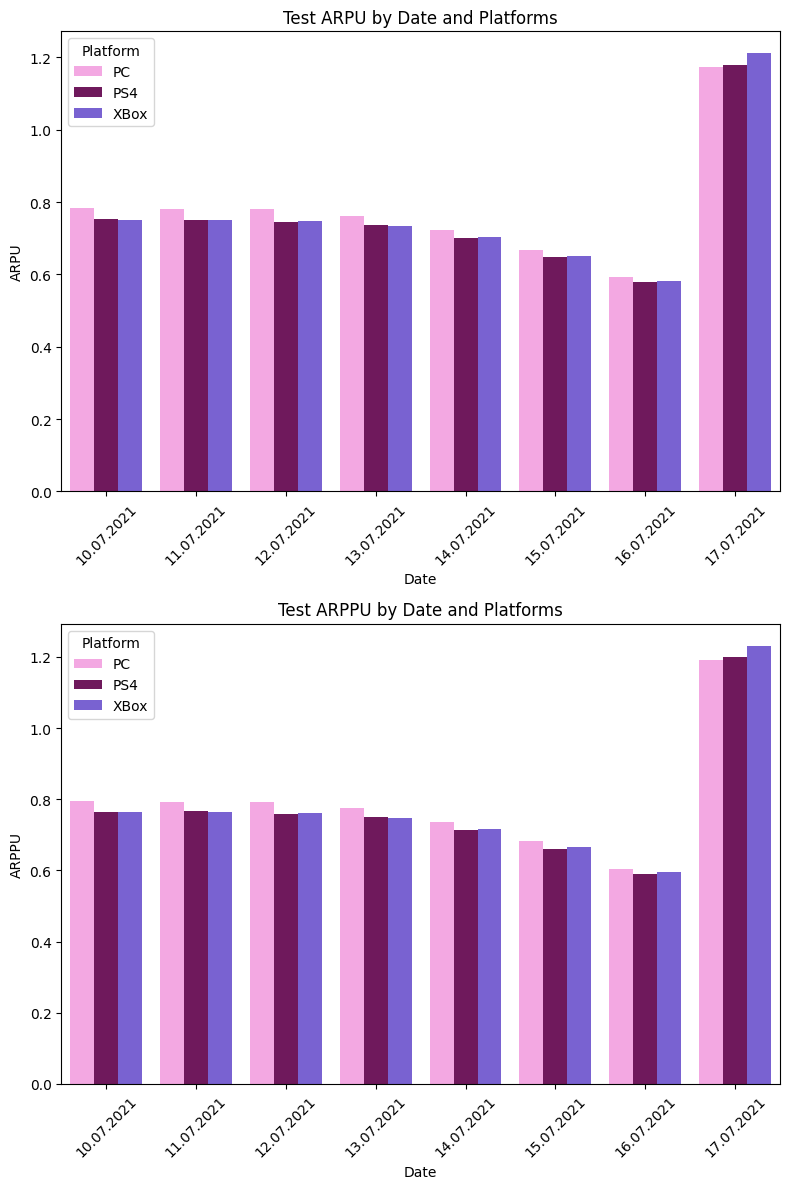

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

sns.barplot(x='date', y='arpu', hue='platform', data=b_money_platforms, palette=custom_palette, ax=axes[0])
axes[0].set_title('Test ARPU by Date and Platforms')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('ARPU')
axes[0].legend(title='Platform')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='date', y='arppu', hue='platform', data=b_money_platforms, palette=custom_palette, ax=axes[1])
axes[1].set_title('Test ARPPU by Date and Platforms')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('ARPPU')
axes[1].legend(title='Platform')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analysis

### Comparing results of test and control groups the difference is highly visible. The test PS4 and XBox values were quite the same for 4 days and then started gradually declining to the 16th of July. The PC ARPU/ARPPU were steadily declining however still remained as highest parameter amoung other platforms until 17.07. On the last day in both ARPU and ARPPU barplots XBox leaped as in the control group.

# Saving csv files

In [202]:
arpu_ab_money.to_excel('arpu_arppu.xlsx', index = False)

In [203]:
a_money_platforms.to_excel('a_money_platforms.xlsx', index = False)
b_money_platforms.to_excel('b_money_platforms.xlsx', index = False)

In [204]:
a_cash_platforms.to_csv('a_cash_platforms.csv', index = False)
b_cash_platforms.to_csv('b_cash_platforms.csv', index = False)